In [3]:
import xarray as xr
import semopy as sm
from pcv.process import select_data
import matplotlib.pylab as plt
import pandas as pd
import numpy as np

In [4]:

temp_path = "/Users/anand/Documents/data/project_3_data/data/detrended_temp.nc"
tp_path = "/Users/anand/Documents/data/project_3_data/data/detrended_tp.nc"
rad_path = "/Users/anand/Documents/data/project_3_data/data/detrended_ssrd.nc"
lai_path = "/Users/anand/Documents/data/project_3_data/data/detrended_lai.nc"
swvlall_path = "/Users/anand/Documents/data/project_3_data/data/detrended_swvlall.nc"
vpd_path = "/Users/anand/Documents/data/project_3_data/data/detrended_vpd.nc"


temp_data = xr.open_dataset(temp_path)
tp_data = xr.open_dataset(tp_path)
ssrd_data = xr.open_dataset(rad_path)
swvlall_data = xr.open_dataset(swvlall_path)
vpd_data = xr.open_dataset(vpd_path)
lai_data = xr.open_dataset(lai_path)

temp_winter = select_data(temp_data,  "winter")
temp_spring = select_data(temp_data,  "spring")
temp_summer = select_data(temp_data,  "summer")

tp_winter = select_data(tp_data,  "winter")
tp_spring = select_data(tp_data,  "spring")
tp_summer = select_data(tp_data,  "summer")

ssrd_winter = select_data(ssrd_data,  "winter")
ssrd_spring = select_data(ssrd_data,  "spring")
ssrd_summer = select_data(ssrd_data,  "summer")

lai_winter = select_data(lai_data,  "winter")
lai_spring = select_data(lai_data,  "spring")
lai_summer = select_data(lai_data,  "summer")

swvlall_winter = select_data(swvlall_data,  "winter")
swvlall_spring = select_data(swvlall_data,  "spring")
swvlall_summer = select_data(swvlall_data,  "summer")

vpd_winter = select_data(vpd_data,  "winter")
vpd_spring = select_data(vpd_data,  "spring")
vpd_summer = select_data(vpd_data,  "summer")

In [5]:

mod_0 = """
# measurement model

lai_spring ~ tp_spring + ssrd_spring + temp_spring
swvlall_summer ~ lai_spring + ssrd_summer + temp_summer+ tp_summer
lai_summer ~ swvlall_summer
lai_summer ~ lai_spring

"""

mod_1 = """
# measurement model

lai_spring ~ tp_spring + ssrd_spring + temp_spring
swvlall_summer ~ lai_spring + ssrd_summer + temp_summer+ tp_summer
lai_summer ~ swvlall_summer + ssrd_summer + temp_summer+ tp_summer
lai_summer ~ lai_spring

"""

mod_2 = """
# measurement model

lai_spring ~ tp_spring + ssrd_spring + temp_spring + swvlall_spring
swvlall_summer ~ lai_spring + ssrd_summer + temp_summer+ tp_summer
swvlall_spring ~ lai_winter + ssrd_spring + temp_spring+ tp_spring
lai_summer ~ swvlall_summer + ssrd_summer + temp_summer+ tp_summer
lai_summer ~ lai_spring
lai_spring ~ lai_winter

"""

mod_list = [mod_0, mod_1, mod_2]


In [34]:
mod = mod_list[1]
lat = 170
lon = 54

llat = lai_winter.__xarray_dataarray_variable__[:, lat, lon].longitude.values
llon = lai_winter.__xarray_dataarray_variable__[:, lat, lon].latitude.values


lai_w = lai_winter.__xarray_dataarray_variable__[:, lat, lon].to_numpy()[-39:]

assert np.isnan(lai_w).any() != True

lai_sp = lai_spring.__xarray_dataarray_variable__[:, lat, lon].to_numpy()[-39:]
lai_su = lai_summer.__xarray_dataarray_variable__[:, lat, lon].to_numpy()[-39:]

temp_w = temp_winter.__xarray_dataarray_variable__[:, lat, lon].to_numpy()[-39:]
temp_sp = temp_spring.__xarray_dataarray_variable__[:, lat, lon].to_numpy()[-39:]
temp_su = temp_summer.__xarray_dataarray_variable__[:, lat, lon].to_numpy()[-39:]

tp_w = tp_winter.__xarray_dataarray_variable__[:, lat, lon].to_numpy()[-39:]
tp_sp = tp_spring.__xarray_dataarray_variable__[:, lat, lon].to_numpy()[-39:]
tp_su = tp_summer.__xarray_dataarray_variable__[:, lat, lon].to_numpy()[-39:]

ssrd_w = ssrd_winter.__xarray_dataarray_variable__[:, lat, lon].to_numpy()[-39:]
ssrd_sp = ssrd_spring.__xarray_dataarray_variable__[:, lat, lon].to_numpy()[-39:]
ssrd_su = ssrd_summer.__xarray_dataarray_variable__[:, lat, lon].to_numpy()[-39:]

vpd_w = vpd_winter.__xarray_dataarray_variable__[:, lat, lon].to_numpy()[-39:]
vpd_sp = vpd_spring.__xarray_dataarray_variable__[:, lat, lon].to_numpy()[-39:]
vpd_su = vpd_summer.__xarray_dataarray_variable__[:, lat, lon].to_numpy()[-39:]

swvlall_w = swvlall_winter.__xarray_dataarray_variable__[:, lat, lon].to_numpy()[-39:]
swvlall_sp = swvlall_spring.__xarray_dataarray_variable__[:, lat, lon].to_numpy()[-39:]
swvlall_su = swvlall_summer.__xarray_dataarray_variable__[:, lat, lon].to_numpy()[-39:]

assert temp_w.shape == temp_sp.shape == temp_su.shape

list_val = [temp_w[:-1], temp_sp[1:], temp_su[1:],
        tp_w[:-1], tp_sp[1:], tp_su[1:], 
        ssrd_w[:-1], ssrd_sp[1:], ssrd_su[1:], 
        lai_w[:-1], lai_sp[1:], lai_su[1:],
        vpd_w[:-1], vpd_sp[1:], vpd_su[1:],
        swvlall_w[:-1], swvlall_sp[1:], swvlall_su[1:]
        ]

col_names = ["temp_winter", "temp_spring", "temp_summer",
                "tp_winter", "tp_spring", "tp_summer",
                "ssrd_winter", "ssrd_spring", "ssrd_summer",
                "lai_winter", "lai_spring", "lai_summer", 
                "vpd_winter", "vpd_spring", "vpd_summer",
                "swvlall_winter", "swvlall_spring", "swvlall_summer",
                ]    

data = np.vstack(list_val).T

df = pd.DataFrame(data, columns=col_names)
df=(df-df.mean())/df.std()
model = sm.Model(mod)
model.fit(df)

SolverResult(fun=0.40422864321264784, success=True, n_it=15, x=array([-0.01912308,  0.09368306, -0.23539433, -0.40897002, -0.01475376,
       -0.12900146,  0.10627797, -0.27179142,  0.29190472, -0.07560095,
        0.21142606,  0.57211804,  0.3911049 ,  0.92920994,  0.77893734]), message='Optimization terminated successfully', name_method='SLSQP', name_obj='MLW')

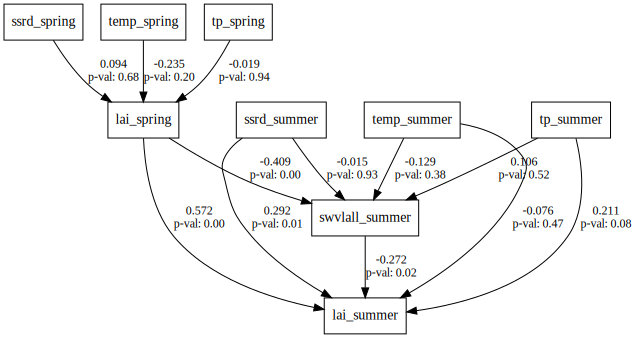

In [35]:
sm.semplot(model, f"images/sem_lat{llat}_lon_{llon}.png")

In [32]:
sm.calc_stats(model)


,DoF,DoF Baseline,chi2,chi2 p-value,chi2 Baseline,CFI,GFI,AGFI,NFI,TLI,RMSEA,AIC,BIC,LogLik
Value,30,42,15.360688,0.987536,131.598046,1.163389,0.883276,0.836586,0.883276,1.228744,0,29.191543,53.755335,0.404229


In [33]:
model.inspect()

,lval,op,rval,Estimate,Std. Err,z-value,p-value
0,lai_spring,~,tp_spring,-0.019123,0.238314,-0.080243,9.360439e-01
1,lai_spring,~,ssrd_spring,0.093683,0.224076,0.418087,6.758838e-01
2,lai_spring,~,temp_spring,-0.235394,0.182696,-1.288451,1.975889e-01
3,swvlall_summer,~,lai_spring,-0.408970,0.145384,-2.813030,4.907705e-03
4,swvlall_summer,~,ssrd_summer,-0.014754,0.166215,-0.088763,9.292700e-01
5,swvlall_summer,~,temp_summer,-0.129001,0.146052,-0.883259,3.770964e-01
6,swvlall_summer,~,tp_summer,0.106278,0.166937,0.636637,5.243613e-01
7,lai_summer,~,swvlall_summer,-0.271791,0.114949,-2.364461,1.805632e-02
8,lai_summer,~,ssrd_summer,0.291905,0.117790,2.478171,1.320578e-02
9,lai_summer,~,temp_summer,-0.075601,0.104548,-0.723123,4.696042e-01
